In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
%matplotlib inline


In [2]:
X = torch.linspace(1, 50, 50).reshape(-1, 1)

In [3]:
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [4]:
torch.manual_seed(71)
err = torch.randint(-5, 5, (50, 1), dtype=torch.float)
print(err)

tensor([[-2.],
        [ 2.],
        [-4.],
        [ 0.],
        [-3.],
        [ 3.],
        [ 3.],
        [-2.],
        [ 0.],
        [ 3.],
        [ 3.],
        [-3.],
        [-4.],
        [ 3.],
        [-3.],
        [ 4.],
        [ 0.],
        [ 1.],
        [-2.],
        [ 3.],
        [-4.],
        [ 0.],
        [ 3.],
        [-5.],
        [ 2.],
        [-2.],
        [-5.],
        [ 1.],
        [ 0.],
        [-5.],
        [-3.],
        [-3.],
        [-2.],
        [-2.],
        [-1.],
        [ 1.],
        [ 0.],
        [ 1.],
        [ 0.],
        [ 3.],
        [ 1.],
        [ 2.],
        [ 1.],
        [-3.],
        [ 2.],
        [-5.],
        [-3.],
        [-1.],
        [ 2.],
        [ 4.]])


In [5]:
y = 2*X + 3 + err

In [6]:
y

tensor([[  3.],
        [  9.],
        [  5.],
        [ 11.],
        [ 10.],
        [ 18.],
        [ 20.],
        [ 17.],
        [ 21.],
        [ 26.],
        [ 28.],
        [ 24.],
        [ 25.],
        [ 34.],
        [ 30.],
        [ 39.],
        [ 37.],
        [ 40.],
        [ 39.],
        [ 46.],
        [ 41.],
        [ 47.],
        [ 52.],
        [ 46.],
        [ 55.],
        [ 53.],
        [ 52.],
        [ 60.],
        [ 61.],
        [ 58.],
        [ 62.],
        [ 64.],
        [ 67.],
        [ 69.],
        [ 72.],
        [ 76.],
        [ 77.],
        [ 80.],
        [ 81.],
        [ 86.],
        [ 86.],
        [ 89.],
        [ 90.],
        [ 88.],
        [ 95.],
        [ 90.],
        [ 94.],
        [ 98.],
        [103.],
        [107.]])

In [7]:
y.shape

torch.Size([50, 1])

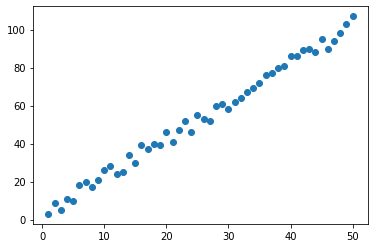

In [8]:
plt.scatter(X.numpy(), y.numpy())

In [9]:
torch.manual_seed(78)
model = nn.Linear(1, 1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.3312]], requires_grad=True)
Parameter containing:
tensor([-0.6855], requires_grad=True)


In [10]:
class Model(nn.Module):
    
    def __init__(self, in_features=1, out_features=1):
        
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
        

In [11]:
torch.manual_seed(14)
model = Model()
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1390]], requires_grad=True)
Parameter containing:
tensor([-0.9906], requires_grad=True)


In [12]:
for name, param in model.named_parameters():
    print(name,param.item(), sep="\t")

linear.weight	0.13898980617523193
linear.bias	-0.9905595779418945


In [13]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([-0.7126], grad_fn=<AddBackward0>)


In [14]:
# 2*model.linear.weight + model.linear.bias
# out -> tensor([[-0.7126]], grad_fn=<AddBackward0>)

In [15]:
x1 = np.linspace(0, 50, 50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [16]:
w1 = 0.13898980617523193
b1 = -0.9905595779418945

y1 = w1*x1 + b1

In [17]:
y1

array([-9.90559578e-01, -8.48733245e-01, -7.06906912e-01, -5.65080579e-01,
       -4.23254247e-01, -2.81427914e-01, -1.39601581e-01,  2.22475188e-03,
        1.44051085e-01,  2.85877418e-01,  4.27703750e-01,  5.69530083e-01,
        7.11356416e-01,  8.53182749e-01,  9.95009082e-01,  1.13683541e+00,
        1.27866175e+00,  1.42048808e+00,  1.56231441e+00,  1.70414075e+00,
        1.84596708e+00,  1.98779341e+00,  2.12961974e+00,  2.27144608e+00,
        2.41327241e+00,  2.55509874e+00,  2.69692508e+00,  2.83875141e+00,
        2.98057774e+00,  3.12240407e+00,  3.26423041e+00,  3.40605674e+00,
        3.54788307e+00,  3.68970941e+00,  3.83153574e+00,  3.97336207e+00,
        4.11518840e+00,  4.25701474e+00,  4.39884107e+00,  4.54066740e+00,
        4.68249374e+00,  4.82432007e+00,  4.96614640e+00,  5.10797273e+00,
        5.24979907e+00,  5.39162540e+00,  5.53345173e+00,  5.67527807e+00,
        5.81710440e+00,  5.95893073e+00])

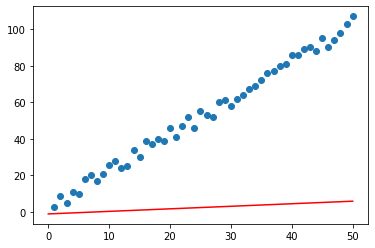

In [18]:
plt.plot(x1, y1, 'r')
plt.scatter(X.numpy(), y.numpy())

In [19]:
criterion = nn.MSELoss()

In [20]:
optimizer = torch.optim.SGD(model.parameters(), lr=.001)

In [21]:
epochs = 1000
losses = list()
for epochi in range(epochs):
    
    epochi+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f"For {epochi}th epoch losss is {loss.item()}, weight is {model.linear.weight.item()}, bias is {model.linear.bias.item()}.")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

For 1th epoch losss is 3336.618408203125, weight is 0.13898980617523193, bias is -0.9905595779418945.
For 2th epoch losss is 1727.5240478515625, weight is 3.518702983856201, bias is -0.8884268999099731.
For 3th epoch losss is 896.8046264648438, weight is 1.0902397632598877, bias is -0.9588639140129089.
For 4th epoch losss is 467.93231201171875, weight is 2.8350400924682617, bias is -0.9053084254264832.
For 5th epoch losss is 246.51947021484375, weight is 1.581287145614624, bias is -0.9408448338508606.
For 6th epoch losss is 132.2106475830078, weight is 2.4820401668548584, bias is -0.9123687744140625.
For 7th epoch losss is 73.1956787109375, weight is 1.8347480297088623, bias is -0.9298880696296692.
For 8th epoch losss is 42.7269401550293, weight is 2.2997498512268066, bias is -0.9143604636192322.
For 9th epoch losss is 26.99565887451172, weight is 1.9655516147613525, bias is -0.9225789904594421.
For 10th epoch losss is 18.872724533081055, weight is 2.2055909633636475, bias is -0.913736

For 356th epoch losss is 9.348433494567871, weight is 2.0890419483184814, bias is -0.37259477376937866.
For 357th epoch losss is 9.34635066986084, weight is 2.0889992713928223, bias is -0.3711507320404053.
For 358th epoch losss is 9.344264030456543, weight is 2.088956117630005, bias is -0.3697074055671692.
For 359th epoch losss is 9.342182159423828, weight is 2.0889134407043457, bias is -0.368264764547348.
For 360th epoch losss is 9.340100288391113, weight is 2.0888705253601074, bias is -0.3668228089809418.
For 361th epoch losss is 9.338022232055664, weight is 2.088827610015869, bias is -0.3653815686702728.
For 362th epoch losss is 9.335946083068848, weight is 2.08878493309021, bias is -0.3639410138130188.
For 363th epoch losss is 9.333869934082031, weight is 2.0887420177459717, bias is -0.3625011742115021.
For 364th epoch losss is 9.331798553466797, weight is 2.0886995792388916, bias is -0.36106202006340027.
For 365th epoch losss is 9.329724311828613, weight is 2.088656425476074, bias

For 756th epoch losss is 8.656279563903809, weight is 2.0734376907348633, bias is 0.15259164571762085.
For 757th epoch losss is 8.654861450195312, weight is 2.0734031200408936, bias is 0.15378114581108093.
For 758th epoch losss is 8.653448104858398, weight is 2.073367118835449, bias is 0.15497002005577087.
For 759th epoch losss is 8.6520357131958, weight is 2.0733323097229004, bias is 0.15615835785865784.
For 760th epoch losss is 8.650627136230469, weight is 2.073296546936035, bias is 0.15734609961509705.
For 761th epoch losss is 8.649213790893555, weight is 2.0732617378234863, bias is 0.1585332751274109.
For 762th epoch losss is 8.647809028625488, weight is 2.0732262134552, bias is 0.15971985459327698.
For 763th epoch losss is 8.64639663696289, weight is 2.073190927505493, bias is 0.1609058827161789.
For 764th epoch losss is 8.64499282836914, weight is 2.0731558799743652, bias is 0.16209132969379425.
For 765th epoch losss is 8.643588066101074, weight is 2.073120594024658, bias is 0.16

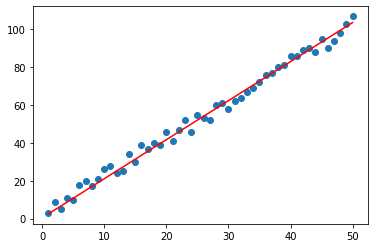

In [22]:
plt.plot(X.numpy(), X.numpy()*2.0653035640716553+0.4263802170753479, 'r')
plt.scatter(X.numpy(), y.numpy())